In [1]:
a=[0,0,1,1,0,0,
  0,1,0,0,1,0,
  1,1,1,1,1,1,
  1,0,0,0,0,1,
  1,0,0,0,0,1]
b=[0,1,1,1,1,0,
  0,1,0,0,1,0,
  0,1,1,1,1,1,
  0,1,0,0,1,0,
  0,1,1,1,1,0]
c=[0,1,1,1,1,0,
  0,1,0,0,0,0,
  0,1,0,0,0,0,
  0,1,0,0,0,0,
   0,1,1,1,1,0]

In [2]:
y=[[1,0,0],
  [0,1,0],
  [0,0,1]]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

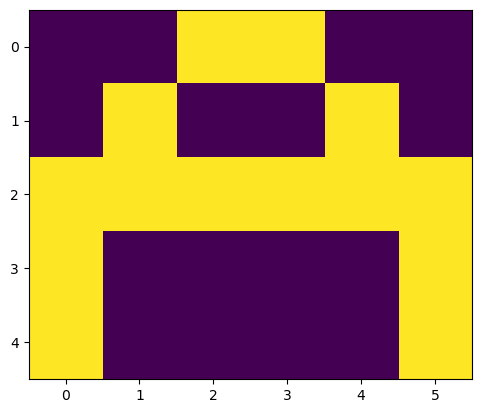

In [4]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [5]:
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30), np.array(c).reshape(1,30)]
y=np.array(y)
print(x,'\n\n',y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [7]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [9]:
def forward(x,w1,w2):
    z1=x.dot(w1)
    a1=sigmoid(z1)
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    return(a2)

In [11]:
def generate(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))

In [13]:
def loss(out,Y):
    s=(np.square(out-Y))
    s=np.sum(s)/len(y)
    return s

In [36]:
def back_propagation(x,y,w1,w2,alpha):
    z1=x.dot(w1)
    a1=sigmoid(z1)
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    d2=(a2-y)
    d1 = np.multiply((w2.dot(d2.transpose())).transpose(), np.multiply(a1, 1 - a1))
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)
    w1=w1-(alpha*(w1_adj))
    w2=w2-(alpha*(w2_adj))
    return (w1,w2)

In [37]:
def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    losses = []  # Renamed to avoid conflict with the loss function
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = forward(x[i], w1, w2)  # Corrected indexing
            l.append(loss(out, Y[i]))  # Ensure loss function is used correctly
            w1, w2 = back_propagation(x[i], Y[i], w1, w2, alpha)  # Consistent variable names
        print("Epochs: ", j+1, "acc:", (1 - sum(l) / len(x)) * 100)
        acc.append((1 - sum(l) / len(x)) * 100)
        losses.append(sum(l) / len(x))
    return (acc, losses, w1, w2)

In [38]:
def predict(x,w1,w2):
    Out=forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm=Out[0][i]
            k=i
    if(k==0):
        print("Image is of letter A")
    elif(k==1):
        print("IMage is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [39]:
w1=generate(30,5)
w2=generate(5,3)
print(w1,"\n",w2)

[[ 0.83652941 -0.0857955  -1.32871039 -0.89678698  0.72395766]
 [ 0.85763476 -0.44270327 -0.22440214  1.41502742 -0.79430105]
 [-0.40017792 -0.62955732  0.49670198  0.26860239  0.87390238]
 [ 1.89450897  1.10090634 -0.1261512   0.15115086 -1.12985548]
 [-0.08792189  1.29502587 -1.1514067   0.34307106  0.49761546]
 [ 0.32965537  0.16462744  0.65505064 -0.98539674  0.48490433]
 [ 2.01268447 -1.34613065  1.18785277 -1.37746228 -0.32530328]
 [-1.1147545  -1.92072891 -0.82781018 -1.48053346 -0.10128219]
 [-0.55294107  0.00698736  0.6364315  -1.0910435   0.7650911 ]
 [ 1.63653249  0.5339879   0.44213719 -0.34417468 -0.29867849]
 [ 0.2087212   0.39450268  0.23401999 -2.00658624  0.48192597]
 [ 0.38074752  0.30899531  1.45765591 -0.55038532  0.68296848]
 [-1.00133269  1.47901111  0.2796876   1.33943082  0.47747984]
 [ 0.75600547  1.04580452  1.08916584  0.5286574  -0.39717831]
 [ 0.70315488 -0.99713898 -0.30591715  0.32345658  0.36263072]
 [ 0.87421425  0.87975744 -0.06665543 -0.46427487  1.31

In [40]:
acc,loss,w1,w2=train(x,y,w1,w2,0.1,100)

Epochs:  1 acc: 68.75147395238015
Epochs:  2 acc: 70.43843371320068
Epochs:  3 acc: 72.10898302283634
Epochs:  4 acc: 73.70722975218519
Epochs:  5 acc: 75.17206325351744
Epochs:  6 acc: 76.46602880702697
Epochs:  7 acc: 77.58968982916107
Epochs:  8 acc: 78.56808621351901
Epochs:  9 acc: 79.42948463725402
Epochs:  10 acc: 80.1957822865023
Epochs:  11 acc: 80.88235020222062
Epochs:  12 acc: 81.5002769817903
Epochs:  13 acc: 82.05816869483525
Epochs:  14 acc: 82.56317053434434
Epochs:  15 acc: 83.021468525509
Epochs:  16 acc: 83.4385204061501
Epochs:  17 acc: 83.81916532653321
Epochs:  18 acc: 84.1676871722986
Epochs:  19 acc: 84.48786413430362
Epochs:  20 acc: 84.78301635031814
Epochs:  21 acc: 85.05605420443833
Epochs:  22 acc: 85.30952638150988
Epochs:  23 acc: 85.54566595887042
Epochs:  24 acc: 85.766433093379
Epochs:  25 acc: 85.97355344533419
Epochs:  26 acc: 86.16855202723276
Epochs:  27 acc: 86.35278256018611
Epochs:  28 acc: 86.52745265855513
Epochs:  29 acc: 86.69364527830926
Ep

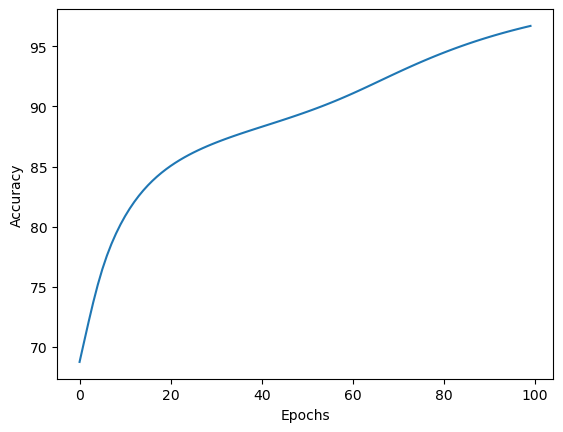

In [41]:
plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

In [42]:
print(w1,"\n",w2)

[[ 8.36529413e-01 -8.57954973e-02 -1.32871039e+00 -8.96786976e-01
   7.23957657e-01]
 [ 8.60160584e-01 -4.65022073e-01 -7.11760027e-01  1.13274989e+00
  -5.72841239e-01]
 [-4.94528501e-01 -2.63885620e-01  4.35907853e-01  6.66311172e-01
   1.03233995e+00]
 [ 1.80015839e+00  1.46657804e+00 -1.86945328e-01  5.48859639e-01
  -9.71417917e-01]
 [-8.53960644e-02  1.27270706e+00 -1.63876458e+00  6.07935327e-02
   7.19075274e-01]
 [ 3.29655374e-01  1.64627444e-01  6.55050644e-01 -9.85396745e-01
   4.84904329e-01]
 [ 2.01268447e+00 -1.34613065e+00  1.18785277e+00 -1.37746228e+00
  -3.25303284e-01]
 [-1.20910508e+00 -1.55505722e+00 -8.88604309e-01 -1.08282468e+00
   5.71553762e-02]
 [-5.52941070e-01  6.98735614e-03  6.36431498e-01 -1.09104350e+00
   7.65091102e-01]
 [ 1.63653249e+00  5.33987896e-01  4.42137195e-01 -3.44174677e-01
  -2.98678486e-01]
 [ 1.32296599e-01  1.25029703e+00  6.23455835e-01 -2.27652385e+00
   1.57723519e-01]
 [ 3.80747523e-01  3.08995314e-01  1.45765591e+00 -5.50385315e-01

Image is of letter C


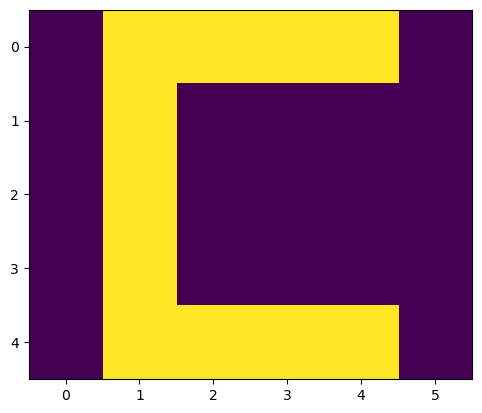

In [44]:
predict(x[2],w1,w2)